In [1]:
import numpy as np
import matplotlib.pyplot as plt

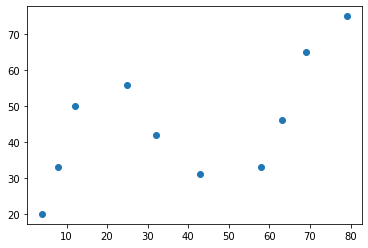

In [2]:
x = [4,8,12,25,32,43,58,63,69,79]
y = [20,33,50,56,42,31,33,46,65,75]

plt.scatter(x, y)

In [3]:
def func(p, x):
    w0, w1, w2 = p
    f = w0 + w1*x + w2*x*x
    return f


In [4]:
def err_func(p, x ,y):
    ret = func(p,x) - y
    return ret

In [5]:
from scipy.optimize import leastsq

p_init = np.random.random(3)

parameters = leastsq(err_func, p_init, args=(np.array(x),np.array(y)))

print("fitting parameter:", parameters[0])

fitting parameter: [ 3.76893135e+01 -2.60474283e-01  8.00078243e-03]


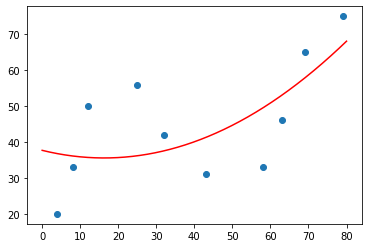

In [6]:
x_temp = np.linspace(0, 80, 10000)

plt.plot(x_temp, func(parameters[0], x_temp), "r")

plt.scatter(x,y)

In [7]:
def fit_func(p,x):
    
    f = np.poly1d(p)
    return f(x)

In [8]:
def err_func(p,x,y):
    
    ret = fit_func(p,x) - y
    return ret

In [9]:
def n_plot(n):
    p_init = np.random.randn(n)
    parameters = leastsq(err_func, p_init, args= (np.array(x),np.array(y)))
    return parameters[0]

In [11]:
n_plot(3)

array([ 8.00077883e-03, -2.60473978e-01,  3.76893095e+01])

Text(0.5, 1.0, 'm=8')

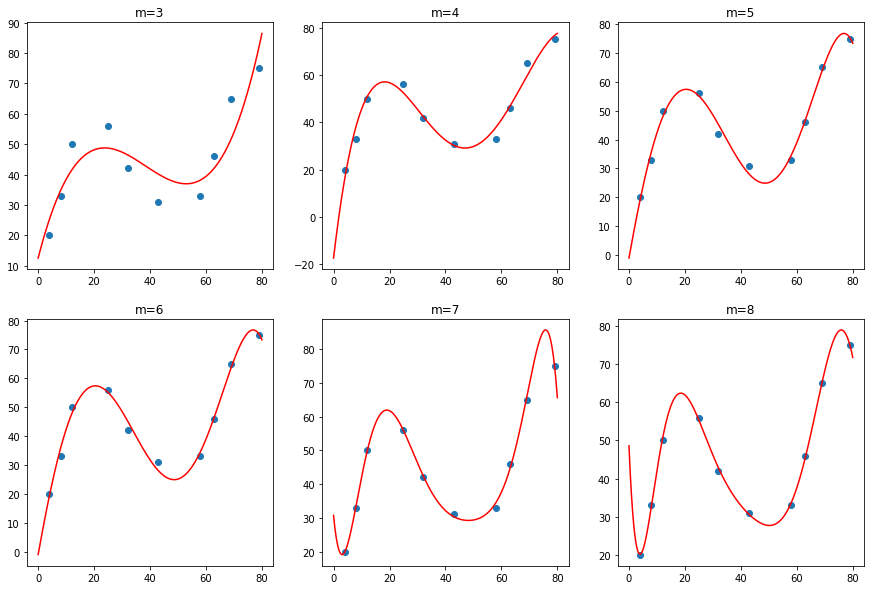

In [14]:
x_temp = np.linspace(0,80,100000)

fig, axes = plt.subplots(2,3,figsize=(15,10))

axes[0,0].plot(x_temp, fit_func(n_plot(4), x_temp), 'r')
axes[0,0].scatter(x,y)
axes[0,0].set_title("m=3")

axes[0,1].plot(x_temp, fit_func(n_plot(5), x_temp), 'r')
axes[0,1].scatter(x,y)
axes[0,1].set_title("m=4")

axes[0,2].plot(x_temp, fit_func(n_plot(6), x_temp), 'r')
axes[0,2].scatter(x,y)
axes[0,2].set_title("m=5")

axes[1,0].plot(x_temp, fit_func(n_plot(6), x_temp), 'r')
axes[1,0].scatter(x,y)
axes[1,0].set_title("m=6")

axes[1,1].plot(x_temp, fit_func(n_plot(8), x_temp), 'r')
axes[1,1].scatter(x,y)
axes[1,1].set_title("m=7")

axes[1,2].plot(x_temp, fit_func(n_plot(9), x_temp), 'r')
axes[1,2].scatter(x,y)
axes[1,2].set_title("m=8")

In [15]:
from sklearn.preprocessing import PolynomialFeatures

X = [2,-1,2]
X_reshape = np.array(X).reshape(len(X),1)

PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 2.,  4.]])

In [16]:
x = np.array(x).reshape(len(x), 1)
y = np.array(y).reshape(len(y), 1)

poly_features = PolynomialFeatures(degree=2, include_bias = False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_x, y)

model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

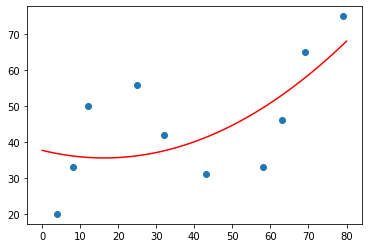

In [20]:
x_temp = np.array(x_temp).reshape(len(x_temp),1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp),'r')
plt.scatter(x,y)